- Đọc data từ 2 file , lấy data từ cột điểm giữa kỳ (dãy X, Y) , điểm cuối kỳ (dãy Z)
- Xây dựng mô hình hồi quy tuyến tính chỉ rõ sự phụ thuộc của điểm cuối kỳ (z) theo các điểm giữa kỳ (x, y)

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [21]:
# đọc dữ liệu từ file excel
df1 = pd.read_excel("../../../Data/68IT1.xlsx", header=9)
df2 = pd.read_excel("../../../Data/68IT2.xlsx", header=9)

In [22]:
# lấy ra bảng điểm
table_score1 = df1.iloc[:,[6, 7, 8]]
table_score2 = df2.iloc[:,[6, 7, 8]]

In [23]:
# Đổi tên các cột
table_score1 = table_score1.rename(columns={'25%':'GK1', '25%.1':'GK2', 1:'CK'})

# 1. Xóa các hàng mà cả 3 cột đều NaN
table_score1 = table_score1.dropna(how='all')
# 3. Xóa các hàng mà không có điểm cuối kỳ
table_score1 = table_score1.dropna(subset=['CK'], how='all')
# 4.Chỉ điền 0 vào các giá trị NaN dựa trên điều kiện mà không thay đổi cấu trúc DataFrame
table_score1[['GK1', 'GK2', 'CK']] = table_score1[['GK1', 'GK2', 'CK']].fillna(0)
# 5. Xóa hàng cuối cùng
table_score1 = table_score1.iloc[:-1]

In [24]:
# Đổi tên các cột
table_score2 = table_score2.rename(columns={'25%':'GK1', '25%.1':'GK2', 1:'CK'})

# 1. Xóa các hàng mà cả 3 cột đều NaN
table_score2 = table_score2.dropna(how='all')
# 3. Xóa các hàng mà không có điểm cuối kỳ
table_score2 = table_score2.dropna(subset=['CK'], how='all')
# 4.Chỉ điền 0 vào các giá trị NaN dựa trên điều kiện mà không thay đổi cấu trúc DataFrame
table_score2[['GK1', 'GK2', 'CK']] = table_score2[['GK1', 'GK2', 'CK']].fillna(0)
# 5. Xóa hàng cuối cùng
table_score2 = table_score2.iloc[:-1]

In [25]:
# Nối 2 bảng điểm
table_score = pd.concat([table_score1, table_score2], ignore_index=True)
table_score

,GK1,GK2,CK
0,4.5,9.5,2.5
1,6.0,6.0,2.0
2,7.5,9.0,4.5
3,4.0,10.0,3.0
4,6.5,5.0,0.5
...,...,...,...
98,2.0,3.0,0.5
99,6.0,1.5,2.0
100,0.5,0.0,0.0
101,7.5,8.0,4.0


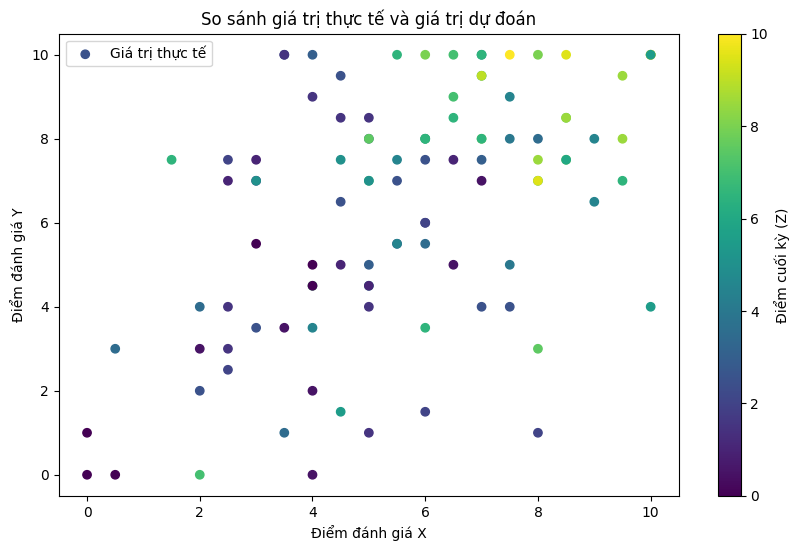

In [26]:
plt.figure(figsize=(10, 6))
plt.scatter(table_score['GK1'], table_score['GK2'], c=table_score['CK'], cmap='viridis', marker='o', label='Giá trị thực tế')
# plt.scatter(table_score['GK1'], table_score['GK2'], c=table_score['CK_pred'], cmap='plasma', marker='x', label='Giá trị dự đoán')
plt.colorbar(label='Điểm cuối kỳ (Z)')
plt.title('So sánh giá trị thực tế và giá trị dự đoán')
plt.xlabel('Điểm đánh giá X')
plt.ylabel('Điểm đánh giá Y')
plt.legend()
plt.show()

In [27]:
# Lấy ra đặc trưng và đích
features = table_score[['GK1', 'GK2']]
labels = table_score[['CK']]

In [28]:
# import model từ thư viện sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures

In [29]:
# Chia dữ liệu thành tập huấn luyện và kiểm thử
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2)

In [30]:
# Tạo các đặc trưng bậc 2
poly = PolynomialFeatures(degree=2)
X_poly_train = poly.fit_transform(X_train)
X_poly_test = poly.transform(X_test)

In [31]:
# Tạo mô hình hồi quy đa thức
model = LinearRegression()
model.fit(X_poly_train, y_train)

LinearRegression()

In [32]:
# Dự đoán trên tập kiểm thử
y_pred = model.predict(X_poly_test)

In [33]:
# Đánh giá mô hình
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 4.967978025132167


In [34]:
# Xem các hệ số của phương trình hồi quy
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

Coefficients: [[ 0.          0.34320519 -0.53829233 -0.03956866  0.11139701  0.02293714]]
Intercept: [1.6354788]


In [35]:
# Dự đoán với x = 7.5, y = 8.0
x_new = np.array([[7.5, 8.0]])

# Chuyển đổi các đặc trưng bậc 2
x_new_poly = poly.transform(x_new)

# Dự đoán giá trị z
z_pred = model.predict(x_new_poly)

z_pred[0]

d:\Python\Machine_Learning\venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


array([5.8292397])

d:\Python\Machine_Learning\venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


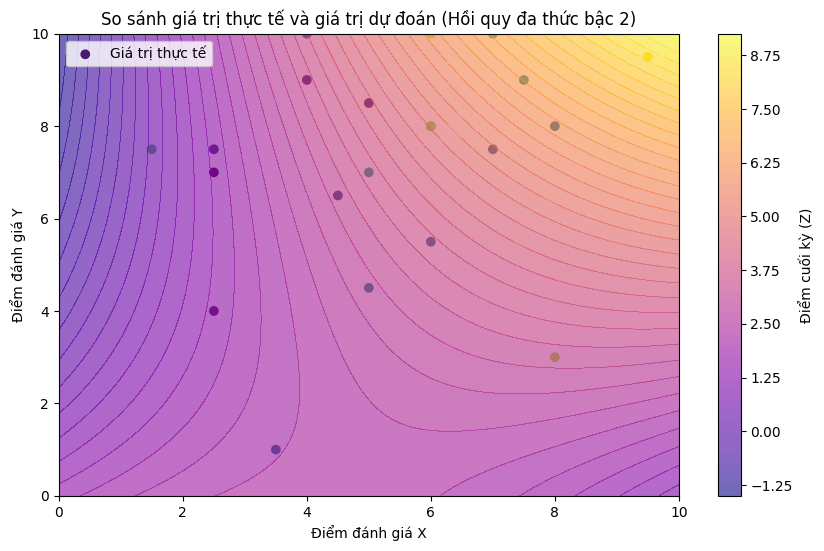

In [36]:
# Trực quan hóa kết quả
plt.figure(figsize=(10, 6))
# Vẽ điểm dữ liệu thực tế
plt.scatter(X_test['GK1'], X_test['GK2'], c=y_test['CK'], cmap='viridis', marker='o', label='Giá trị thực tế')
# Vẽ đường hồi quy cho các điểm (x, y)
x_range = np.linspace(features['GK1'].min(), features['GK1'].max(), 100)
y_range = np.linspace(features['GK2'].min(), features['GK2'].max(), 100)
x_mesh, y_mesh = np.meshgrid(x_range, y_range)
z_mesh = model.predict(poly.transform(np.c_[x_mesh.ravel(), y_mesh.ravel()])).reshape(x_mesh.shape)

# Vẽ bề mặt hồi quy
plt.contourf(x_mesh, y_mesh, z_mesh, levels=50, cmap='plasma', alpha=0.6)
plt.colorbar(label='Điểm cuối kỳ (Z)')
plt.title('So sánh giá trị thực tế và giá trị dự đoán (Hồi quy đa thức bậc 2)')
plt.xlabel('Điểm đánh giá X')
plt.ylabel('Điểm đánh giá Y')
plt.legend()
plt.show()

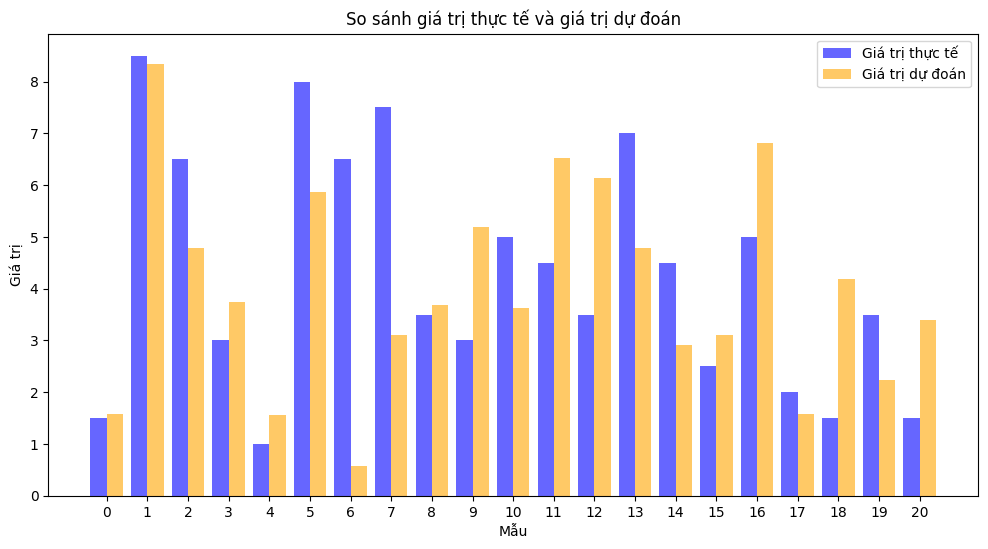

In [37]:
# Tính toán sự khác biệt giữa giá trị thực tế và giá trị dự đoán
difference = y_test['CK'] - y_pred.ravel()  # Chuyển đổi y_pred thành 1D

# Trực quan hóa sự khác biệt
plt.figure(figsize=(12, 6))
x = np.arange(len(difference))  # Tạo mảng chỉ số cho các mẫu

# Vẽ biểu đồ cột
plt.bar(x - 0.2, y_test['CK'], width=0.4, label='Giá trị thực tế', color='blue', alpha=0.6)
plt.bar(x + 0.2, y_pred.ravel(), width=0.4, label='Giá trị dự đoán', color='orange', alpha=0.6)

plt.xlabel('Mẫu')
plt.ylabel('Giá trị')
plt.title('So sánh giá trị thực tế và giá trị dự đoán')
plt.xticks(x)
plt.legend()
plt.show()